In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler

In [26]:
df = pd.read_csv("data/raw/Media-Matrix-Combined-v3.csv")
print(df.shape)

(62, 28)


In [27]:
# set index to compound names
df.set_index(df.columns[0], inplace=True)

In [28]:
# filter rows that were considered not important
df_filtered = df.drop(['Dipotassium phosphate', 'Disodium edta dihydrate', 'EDTA', 'Monopotassium phosphate',
                       'Phosphoric acid', 'Potassium hydroxide', 'Sodium citrate dihydrate', 'Sodium phosphate',
                       'Sulphuric acid', 'Uracil'], axis=0)

print(df_filtered.shape)

(52, 27)


In [29]:
#removes pubchemid column
print (f"column to be dropped {df_filtered.columns[1]}")
print (f"column to be dropped {df.columns[1]}")
# remove pubchemid column
df_filtered = df_filtered.drop(df_filtered.columns[1], axis=1)
df = df.drop(df.columns[1], axis=1)

column to be dropped PubChemCID
column to be dropped PubChemCID


In [30]:
# log transform the data (adding a small pseudocount to avoid log(0))
df_all = df_filtered.copy()

# Identify numeric columns only
numeric_cols = df_filtered.select_dtypes(include=[np.number]).columns

pseudocount = 1e-10
df_all[numeric_cols] = np.log10(df_all[numeric_cols].replace(0, pseudocount))

#df_log = np.log10(full_df)

In [7]:
scaler = StandardScaler()

df_all[numeric_cols] = scaler.fit_transform(df_all[numeric_cols])



In [8]:
yar_df = df_all.filter(like='_YAR')
cer_df = df_all.filter(like='_CER')
pic_df = df_all.filter(like='_PIC')

In [9]:
# these are the created dataframes

print(df_filtered.shape) # raw data 
print(df_all.shape) # log transformed and scaled data
print(yar_df.shape) # YAR data (scaled)
print(cer_df.shape) # CER data (scaled)
print(pic_df.shape) # PIC data (scaled)

(52, 26)
(52, 26)
(52, 10)
(52, 6)
(52, 9)


In [31]:
df_all_reset = df_all.reset_index()  # bring compound out of index


In [32]:
df_long = pd.melt(
    df_all_reset,
    id_vars=['Compound', 'Annotate'],
    var_name='Sample',                    # e.g. '1_YAR', '2a_YAR'
    value_name='log10_Concentration'
)


In [33]:
compound_order = (
    df_long[['Annotate', 'Compound']]
    .drop_duplicates()
    .sort_values(['Annotate', 'Compound'])  # alphabetically within groups
    ['Compound']
    .tolist()
)


C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_7080\221705483.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\uqkmuroi\gitcode\ML_for_rational_design\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


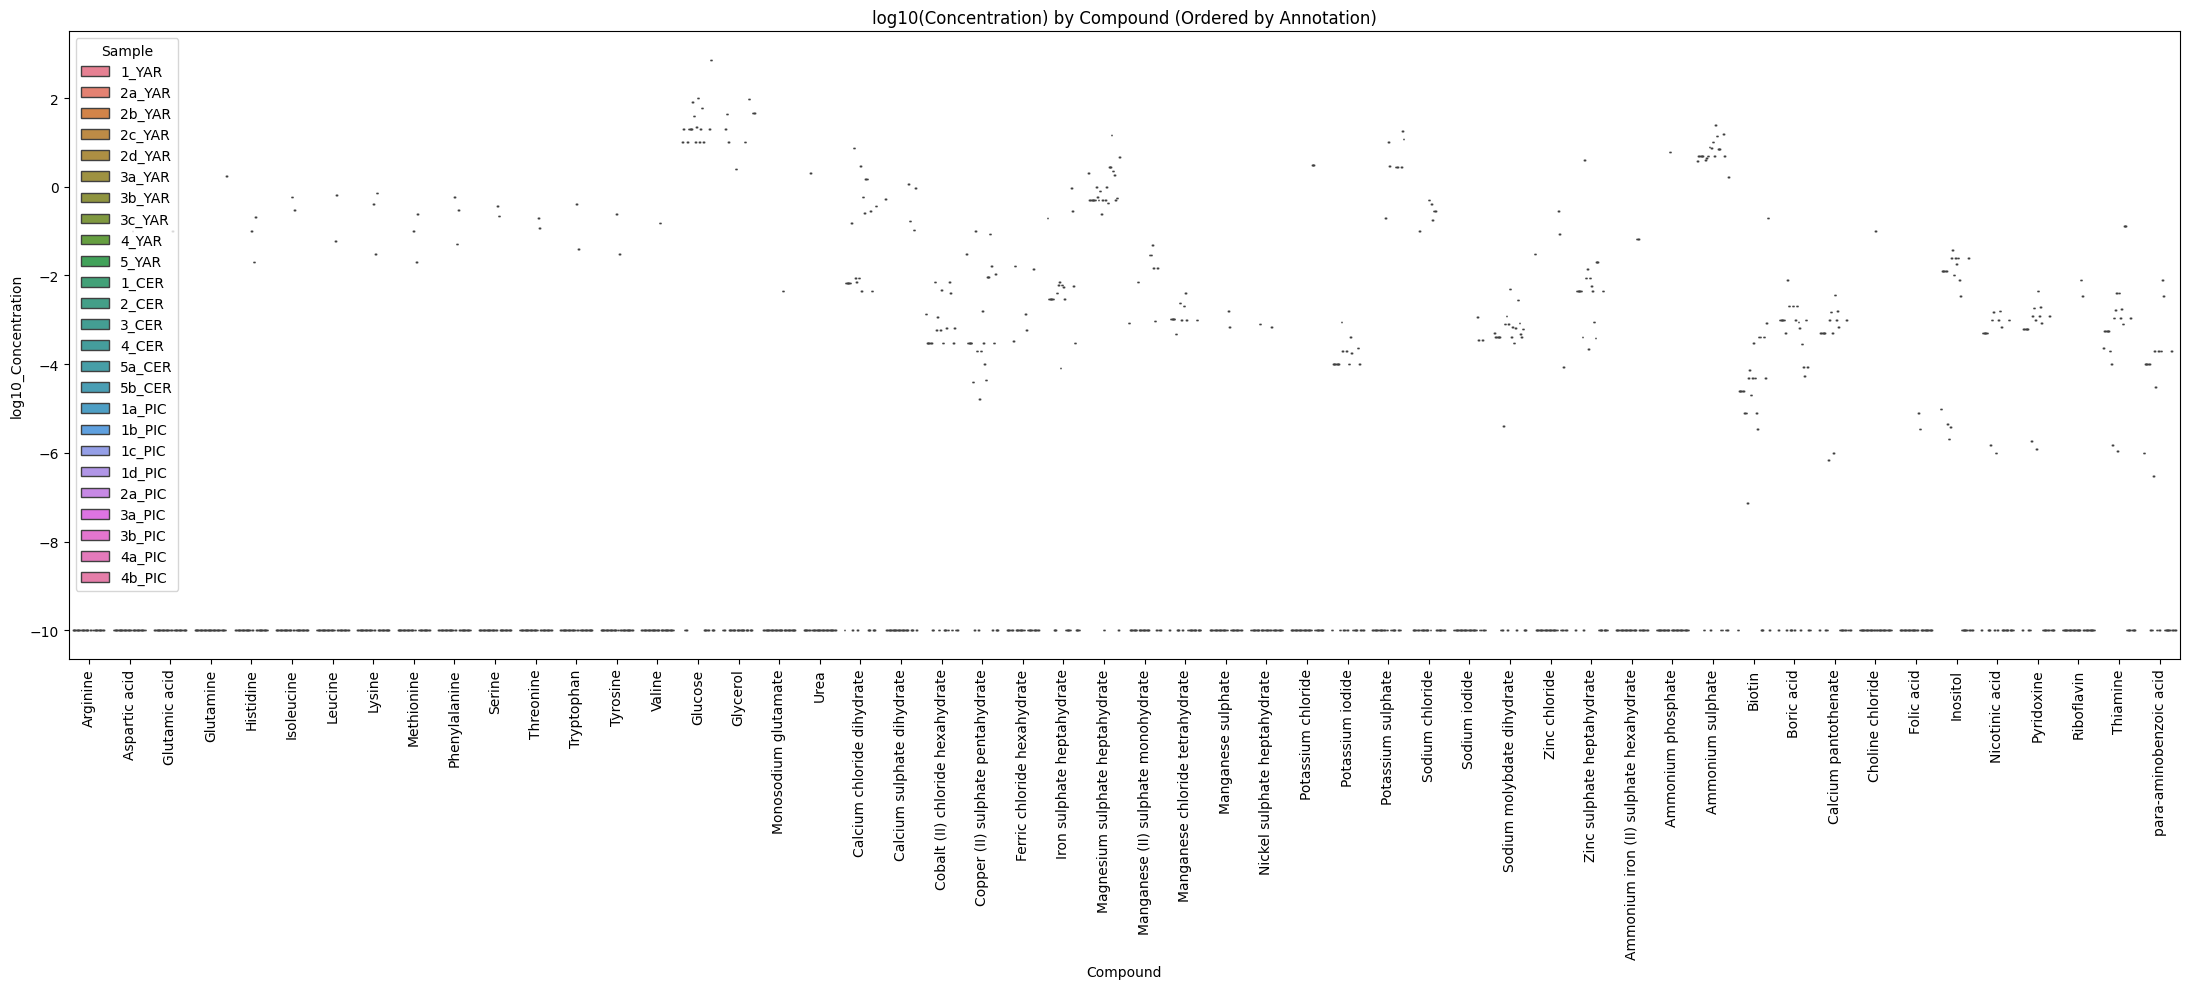

In [34]:

plt.figure(figsize=(22, 10))
sns.boxplot(
    data=df_long,
    x='Compound',
    y='log10_Concentration',
    hue='Sample',           # or strip this out if you only want per-compound distribution
    order=compound_order
)

plt.xticks(rotation=90)
plt.title("log10(Concentration) by Compound (Ordered by Annotation)")
plt.tight_layout()
plt.show()



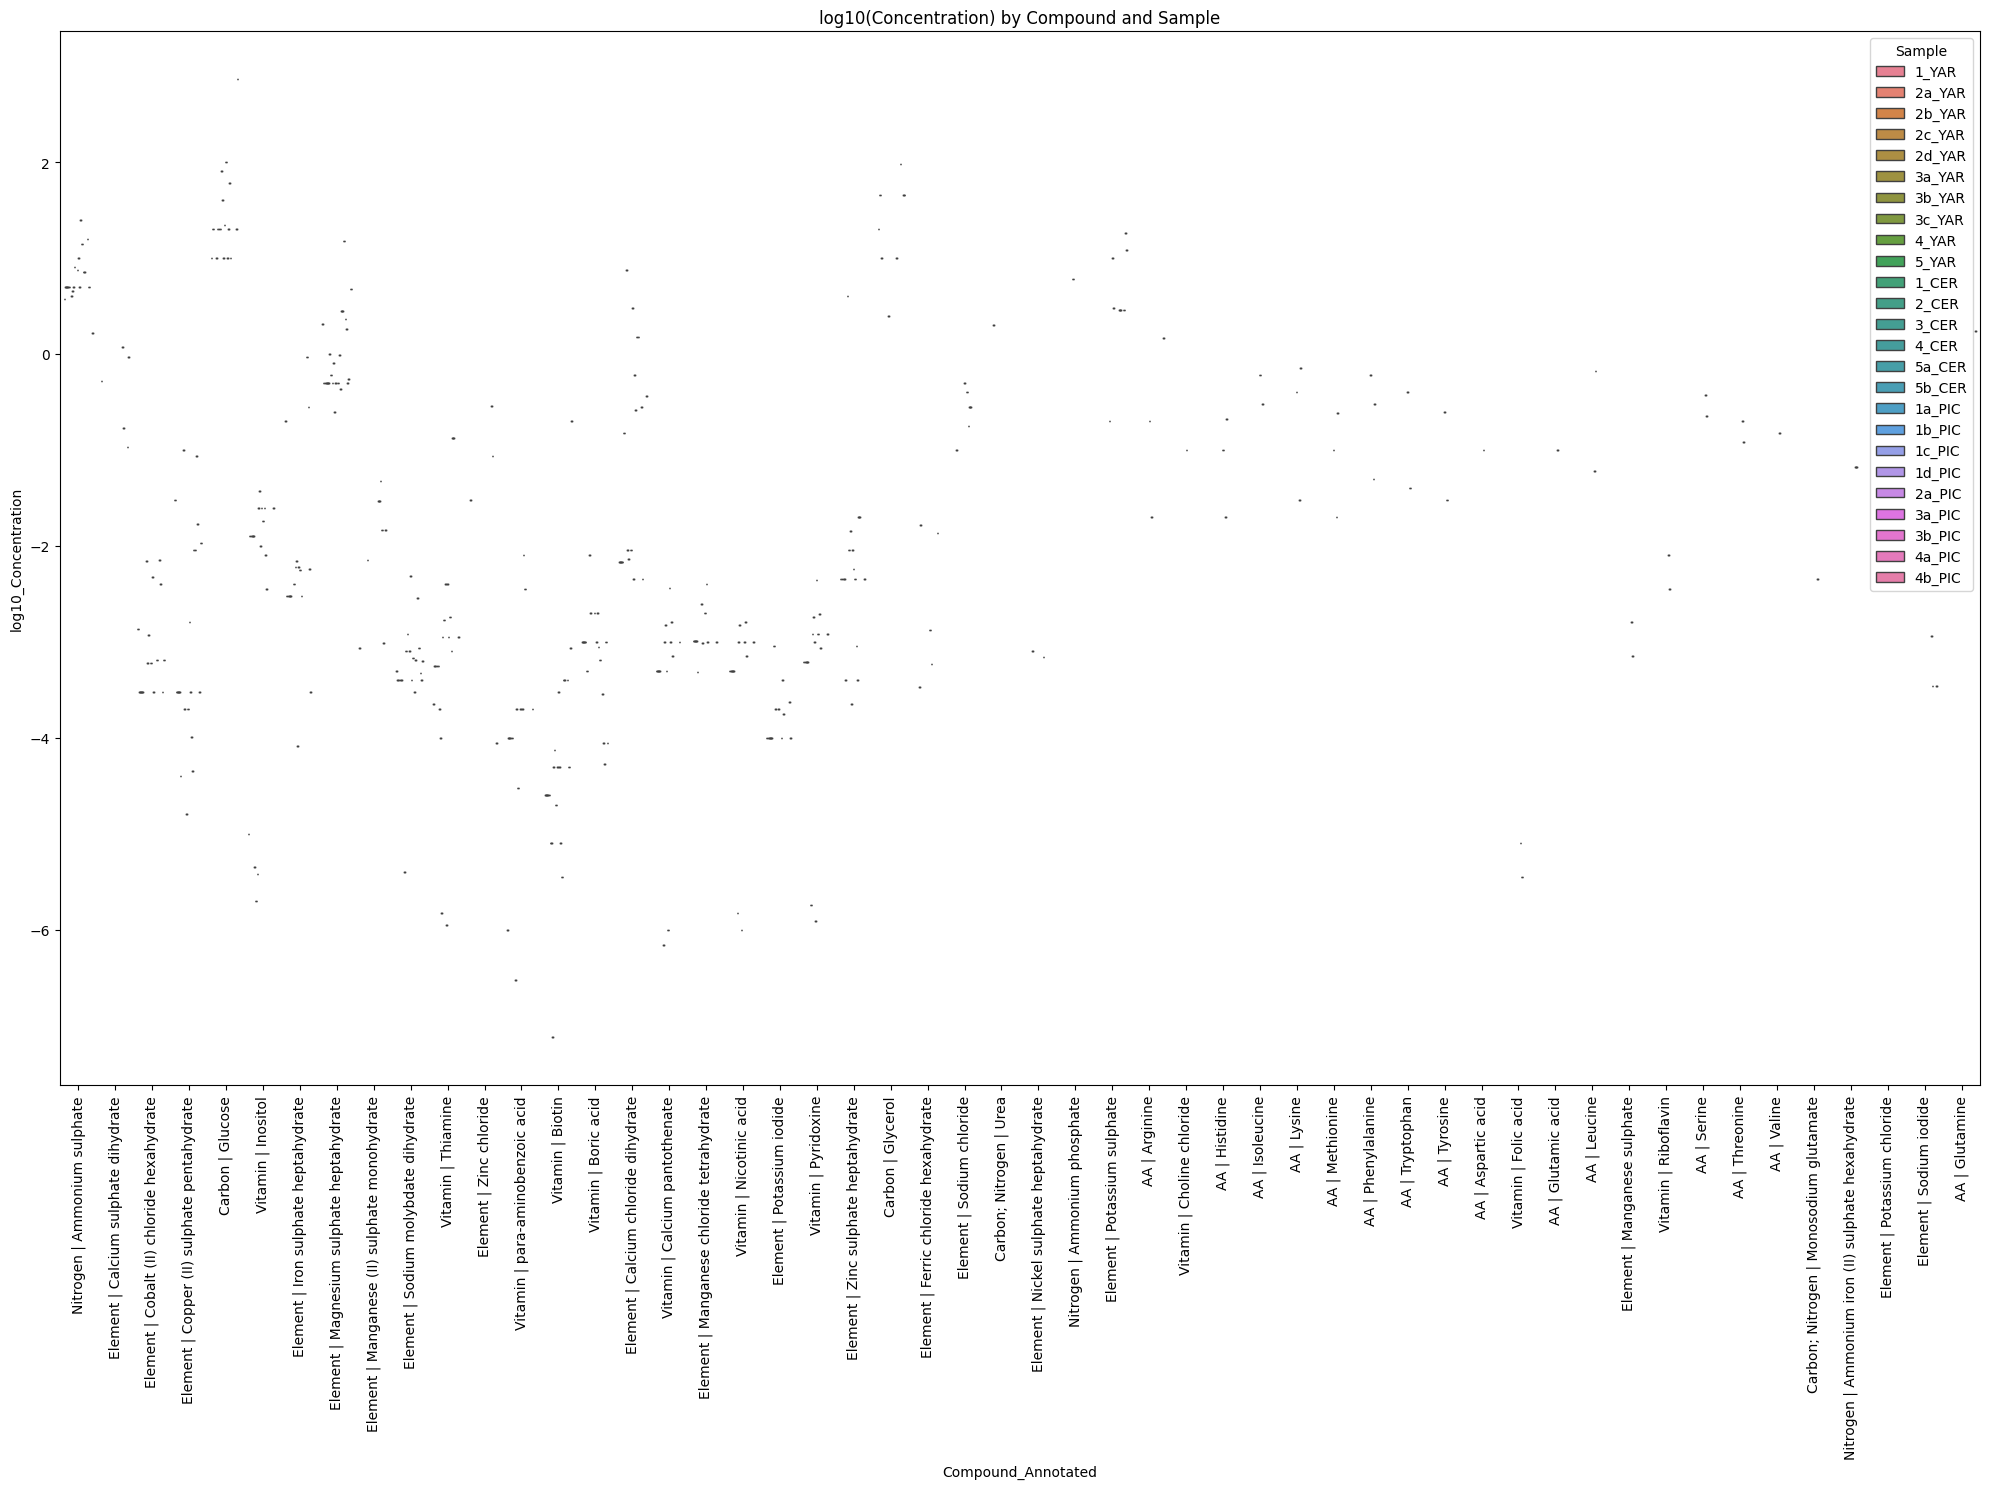

In [36]:

df_long['Compound_Annotated'] = df_long['Annotate'] + ' | ' + df_long['Compound']
plt.figure(figsize=(20, 15))
sns.boxplot(data=df_long[df_long['log10_Concentration'] > -10],  # exclude pseudocount
            x='Compound_Annotated', y='log10_Concentration', hue='Sample')
plt.xticks(rotation=90)
plt.title('log10(Concentration) by Compound and Sample')
plt.tight_layout()
plt.show()

In [23]:
print(df_long)


                                     Compound          Annotate  Sample  \
0     Ammonium iron (II) sulphate hexahydrate          Nitrogen   1_YAR   
1                          Ammonium phosphate          Nitrogen   1_YAR   
2                           Ammonium sulphate          Nitrogen   1_YAR   
3                                    Arginine                AA   1_YAR   
4                               Aspartic acid                AA   1_YAR   
...                                       ...               ...     ...   
1295                                     Urea  Carbon; Nitrogen  4b_PIC   
1296                                   Valine                AA  4b_PIC   
1297                            Zinc chloride           Element  4b_PIC   
1298               Zinc sulphate heptahydrate           Element  4b_PIC   
1299                   para-aminobenzoic acid           Vitamin  4b_PIC   

      log10_Concentration                                 Compound_Annotated  
0               -0.5